# Sympy 

[Sympy](http://sympy.org) je Python biblioteka za simboličku matematiku. Prednost Sympy-ja je što je potpuno napisan u Pythonu (što je katkad i mana). Mi ćemo u nastavku kolegiju obraditi i puno moćniji Sage, koji je [CAS](http://en.wikipedia.org/wiki/Computer_algebra_system) u klasi Mathematice i Maplea. No Sage nije biblioteka u Pythonu, već CAS koji koristi Python kao programski jezik.

Korištenje Sympy-ja počinje kao i kod ostalih biblioteka, s importiranjem.

In [10]:
from sympy import *

Da bi dobili lijepi $\LaTeX$ izlaz:

In [11]:
from sympy import init_printing
init_printing()

Koristit ćemo i interaktivne widgete, pa ih ovdje učitavamo

In [12]:
from IPython.display import display
from ipywidgets import interact, fixed
import ipywidgets as widgets

## Simboličke varijable

Kako je Sympy samo Python paket, trebamo deklarirati koje simbole ćemo koristiti kao simboličke vatrijable. To možemo napraviti na više načina:

In [19]:
x = Symbol('x')
# ili x = symbols('x')
# ili from sympy.abc import x,y,z

In [20]:
(pi + x)**2

In [21]:
a, b, c = symbols("stranica_a, stranica_b, stranica_c")

In [22]:
type(a)

sympy.core.symbol.Symbol

In [23]:
a

In [24]:
a, b, c = symbols("alpha, beta, gamma")
a**2+b**2+c**2

In [25]:
symbols("x:5")

Možemo navoditi i dodatne pretpostavke:

In [26]:
x = Symbol('x', real=True)

In [27]:
x.is_imaginary

False

In [28]:
x = Symbol('x', positive=True)

In [29]:
x > 0

Možemo kreirati i apstraktne funkcije:

In [30]:
f = Function('f')
f(0)

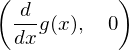

In [31]:
g = Function('g')(x)
g.diff(x), g.diff(a)

### Kompleksni brojevi

Imaginarna jedinica se označava s `I`.

In [32]:
1+1*I

In [33]:
I**2

In [34]:
(x * I + 1)**2

### Razlomci

Postoje tri numerička tipa: `Real`, `Rational`, `Integer`:

In [35]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [36]:
r1

In [37]:
r1+r2

In [38]:
r1/r2

In [39]:
denom(r1)

### Numerička evaluacija

SymPy može računati u proizvoljnoj točnosti te ima predefinirane matematičke konstante kao: `pi`, `e` te `oo` za beskonačnost.

Funkcija `evalf` ili metoda `N` s ulaznom varijablom `n` računaju izraz na `n` decimala.

In [40]:
pi.evalf(n=50)

In [41]:
y = (x + pi)**2

In [42]:
N(y, 5)

Ukoliko želimo zamijeniti varijablu s konkretnim brojem, to možemo učiniti koristeći funkciju `subs`:

In [43]:
y.subs(x, 1.5)

In [44]:
N(y.subs(x, 1.5))

No `subs` možemo korisiti i općenitije:

In [45]:
y.subs(x, a+pi)

Sympy i Numpy se mogu simultano koristiti:

In [47]:
import numpy

In [48]:
x_vec = numpy.arange(0, 10, 0.1)

In [49]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

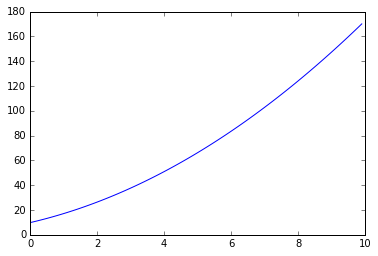

In [50]:
from matplotlib.pyplot import subplots
%matplotlib inline
fig, ax = subplots()
ax.plot(x_vec, y_vec);

Efikasniji kod se postiže funkcijom `lambdify` koja kompajlira Sympy izraz u funkciju:

In [51]:
# prvi argument je lista varijabli funkcije f, u ovom slučaju funckcija je x -> f(x)
f = lambdify([x], (x + pi)**2, 'numpy')

In [52]:
y_vec = f(x_vec)

Razlika u brzini izvođenja:

In [53]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

10 loops, best of 3: 22.8 ms per loop


In [54]:
%%timeit

y_vec = f(x_vec)

The slowest run took 20.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.93 µs per loop


Ovdje smo mogli koristiti i [theano](http://deeplearning.net/software/theano/) ili uFuncify.

Pretvaranje stringa u Sympy izraz:

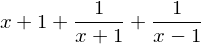

In [55]:
string = '1/(x-1) + 1/(x+1) + x + 1'
izraz = sympify(string)
izraz

Jedan interaktivan primjer:

In [13]:
x = Symbol('x')
def factorit(n):
    return display(Eq(x ** n - 1, factor(x ** n - 1)))

`Eq` kreira matematičke jednakosti, tj. jednadžbe.

In [125]:
factorit(18)

In [127]:
interact(factorit,n=(2,20));

In [130]:
interact(factorit,n=(1,20,2));

In [131]:
interact(factorit,n=widgets.widget_int.IntSlider(min=2,max=20,step=1,value=2));

## Algebarske manipulacije

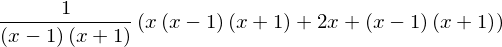

In [56]:
together(izraz)

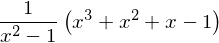

In [57]:
cancel(together(izraz))

In [58]:
(x+1)*(x+2)*(x+3)

In [59]:
expand((x+1)*(x+2)*(x+3))

`expand` prima dodatne argumente. Npr. `trig=True`:

In [60]:
sin(a+b)

In [61]:
expand(sin(a+b), trig=True)

In [62]:
simplify(sin(a)**2 + cos(a)**2)

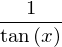

In [63]:
simplify(cos(x)/sin(x))

In [64]:
f1 = 1/((a+1)*(a+2))

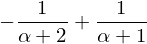

In [65]:
apart(f1)

In [66]:
f2 = 1/(a+2) + 1/(a+3)

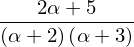

In [67]:
together(f2)

## Analiza

### Deriviranje

In [68]:
y

In [69]:
diff(y**2, x)

Više derivacije:

In [70]:
diff(y**2, x, x)

In [71]:
diff(y**2, x, 2)

In [73]:
from sympy.abc import x,y,z
# ili npr. symbols ('x:z')

In [74]:
f = sin(x*y) + cos(y*z)

Želimo izračunati $$\frac{\partial^3f}{\partial  x \partial y^2}$$

In [75]:
diff(f, x, 1, y, 2)

In [77]:
def deriv(f):
    display(diff(f,x))
interact(deriv, f='x',__manual=True);

### Integracija

In [78]:
f

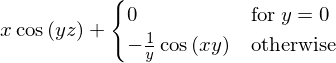

In [79]:
integrate(f, x)

Definitni integrali:

In [80]:
integrate(f, (x, -1, 1))

Nepravi integrali:

In [81]:
integrate(exp(-x**2), (x, -oo, oo))

### Sume i produkti

In [82]:
n = Symbol("n")

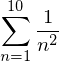

In [83]:
Sum(1/n**2, (n, 1, 10))

In [84]:
Sum(1/n**2, (n,1, 10)).evalf()

In [85]:
Sum(1/n**2, (n, 1, oo)).evalf()

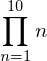

In [86]:
Product(n, (n, 1, 10))

### Limesi

In [87]:
limit(sin(x)/x, x, 0)

In [88]:
f

In [89]:
diff(f, x)

$$ \frac{\partial f(x,y)}{\partial x} = \lim_{h\to 0}\frac{f(x+h,y)-f(x,y)}{h}$$

In [90]:
h = Symbol("h")

In [91]:
limit((f.subs(x, x+h) - f)/h, h, 0)

In [92]:
limit(1/x, x, 0, dir="+")

In [93]:
limit(1/x, x, 0, dir="-")

### (Taylorovi) redovi

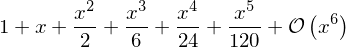

In [94]:
series(exp(x), x)

Rastav oko $x=1$:

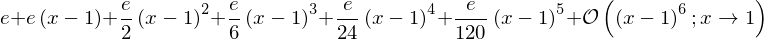

In [95]:
series(exp(x), x, 1)

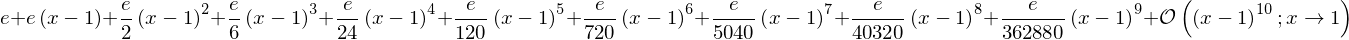

In [96]:
series(exp(x), x, 1, 10)

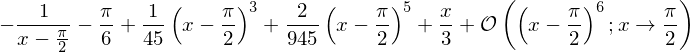

In [97]:
tan(x).series(x,pi/2)

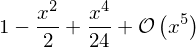

In [98]:
s1 = cos(x).series(x, 0, 5)
s1

In [99]:
s2 = sin(x).series(x, 0, 2)
s2

In [100]:
expand(s1 * s2)

S metodom `removeO` se možemo riješiti $\mathcal{O}$ dijela:

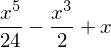

In [101]:
expand(s1.removeO() * s2.removeO())

Ali oprezno s time:

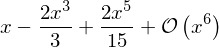

In [103]:
(cos(x)*sin(x)).series(x, 0, 6)

Reziduumi:

In [104]:
residue(2/sin(x), x, 0)

## Linearna algebra

### Matrice

In [112]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

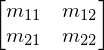

In [111]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [113]:
b = Matrix([[b1], [b2]])
b

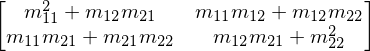

In [114]:
A**2

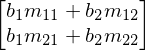

In [115]:
A * b

In [116]:
def funkcija(A,f):
    return display(getattr(A,f)())
interact(funkcija,A = fixed(A), f=('det','inv','adjoint','charpoly'));

## Rješavanje jednadžbi

In [117]:
solve(x**2 - 1, x)

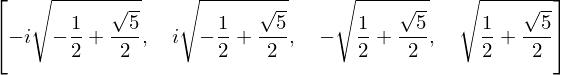

In [118]:
solve(x**4 - x**2 - 1, x)

In [119]:
eq = Eq(x**3 + 2*x**2 + 4*x + 8, 0)
eq

In [120]:
solve(eq, x)

Sustavi jednadžbi:

In [121]:
solve([x + y - 1, x - y - 1], [x,y])

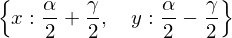

In [122]:
solve([x + y - a, x - y - c], [x,y])

Više o interaktivnim widgetima možete naučiti preko primjera koji se nalaze [ovdje](https://github.com/ipython/ipywidgets/tree/master/examples). 

In [124]:
from verzije import *
from IPython.display import HTML
HTML(print_sysinfo()+info_packages('sympy,matplotlib,IPython,numpy, ipywidgets'))

Python verzija,3.5.1
kompajler,GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
sustav,Linux
broj CPU-a,8
interpreter,64bit
sympy verzija,1.0
matplotlib verzija,1.5.1
IPython verzija,4.1.2
numpy verzija,1.10.4
ipywidgets verzija,4.1.1


## Zadaci za vježbanje

1) Napišite funkciju koja prima listu izraza, varijablu i točku, a ispisuje vrijednost svakog izraza s liste u toj točki. Funkcija treba izgledati ovako

```
def evaluiraj(izrazi, x, x0):
"""
Za svaki izraz iz izrazi funkcija ispisuje vrijednost izraza za x = x0
"""
```

2) Izračunajte 
$\frac{d}{dx}\sin(x)e^x,\,
\frac{\partial}{\partial x}\sin(xy)e^x,\,
\frac{\partial^2}{\partial x\partial y}\sin(xy)e^x.$

3) Izraz `(x**2 + 3*x + 1)/(x**3 + 2*x**2 + x)` pojednostavite do izraza `1/(x**2 + 2*x + 1) + 1/x`

4) Izraz `(a**b)**c)` pojednostavite do izraza `a**(b*c)`

5) Napišite funkciju koja rješava (egzaktno) kvadratnu jednadžbu.

6) Napišite funkciju koja za ulazne parametre prima funkciju (danu simboličkim izrazom) te točku (tj. broj) a crta danu funkciju i njenu tangentu u danoj točki. Učinite funkciju interaktivnom na način da se može birati funkcija (upisivanjem u polje) te točka (klizačem).